In [1]:
pip install powerlaw

In [2]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import powerlaw
warnings.filterwarnings('ignore')

In [4]:
g = nx.Graph()

# Read data from CSV file
with open('/content/weighted_graph.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')  # specifica il delimitatore
    next(reader)  # Skip header row
    for row in reader:
        if len(row) == 3:  # Assicura che ci siano tre valori nella riga
            source, target, weight = row
            g.add_edge(source, target, weight=float(weight))
        else:
            print("Riga non valida:", row)

In [5]:
"""plt.figure(figsize=(10,10))
nx.draw(g, with_labels = False)
plt.show()"""

'plt.figure(figsize=(10,10))\nnx.draw(g, with_labels = False)\nplt.show()'

In [6]:
# Creazione di un grafo (assumo che tu abbia già creato il grafo 'g')
# g = nx.Graph()

# Calcola i gradi dei nodi
degrees = dict(g.degree())

# Calcola il grado massimo
max_degree = max(degrees.values())

# Calcola il grado minimo
min_degree = min(degrees.values())

print("Grado massimo:", max_degree)
print("Grado minimo:", min_degree)


Grado massimo: 798
Grado minimo: 1


##### GRAPH CHARACTERIZATION

In [7]:
g.number_of_nodes()

10042

In [8]:
g.number_of_edges()

725330

In [9]:
g.is_directed()

False

##### GRAPH CHARACTERIZATION

In [10]:
nx.number_connected_components(g)

30

In [11]:
componenti = list(nx.connected_components(g))

# Find the largest connected component
largest_component = max(componenti, key=len)

# Create a subgraph from the largest connected component
largest_subgraph = g.subgraph(largest_component).copy()

In [11]:
len(list(largest_subgraph.nodes()))

9960

In [12]:
nx.diameter(largest_subgraph)

13

In [12]:
average_shortest_path_length = nx.average_shortest_path_length(largest_subgraph)

print(average_shortest_path_length)

3.5557929075474504


In [ ]:
def plot_dist(G):
    M = nx.to_scipy_sparse_array(G)
    indegrees = np.array(M.sum(axis=0)).flatten().astype(int)
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')

    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit


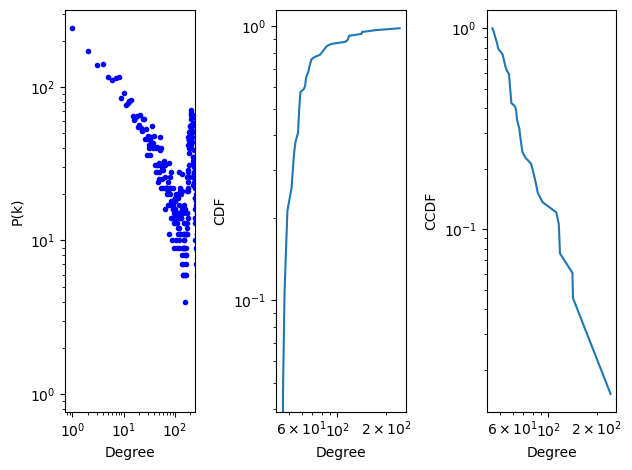

In [ ]:
plot_dist(g)

Density and Clustering

In [ ]:
nx.density(g)

0.014386940649491238

In [ ]:
nx.average_clustering(g)

0.5142742884466117

Centralities

In [17]:
# DEGREE CENTRALITY
degrees = dict(g.degree())
degree_ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
degree_ranks[0:10]

[('Pi’erre Bourne', 798),
 ('Rico Nasty', 798),
 ('Rich The Kid', 798),
 ('Monaleo', 798),
 ('Baby Keem', 797),
 ('A BOOGIE WIT DA HOODIE', 797),
 ('Audrey Nuna', 766),
 ('NGC Daddy', 749),
 ('Nicki Minaj', 747),
 ('Black Eyed Peas', 747)]

In [21]:
# CLOSENESS CENTRALITY
closeness = nx.closeness_centrality(g)
clos_ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
clos_ranks[0:10]

[('Róisín Murphy', 0.362922792902116),
 ('Electrelane', 0.361832655204106),
 ('Chairlift', 0.3617001594498843),
 ('Quinn XCII', 0.3611183290467916),
 ('UPSAHL', 0.36109192668312523),
 ('Saint Etienne', 0.36109192668312523),
 ('Azealia Banks', 0.36102593766143604),
 ('Charlotte Lawrence', 0.36052520820559497),
 ('SAIN', 0.3604462726031561),
 ('Tkay Maidza', 0.3602359465505795)]

In [20]:
# BETWENNESS CENTRALITY
betweenness = nx.betweenness_centrality(g)
branks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
branks[0:10]

[('Sanguisugabogg', 0.011733615059926148),
 ('Juno', 0.010893008328839672),
 ('Devita', 0.009898137232422508),
 ('Clint Mansell', 0.009711097844004061),
 ('AOA', 0.009640602824760727),
 ('okvsho', 0.008789569990050717),
 ('Mike Shinoda', 0.007992121257433146),
 ('The Album Leaf', 0.007224073236787874),
 ('Call Me Karizma', 0.006615434165811591),
 ('Bruce Dickinson', 0.005921243856266095)]

In [19]:
# PAGE RANK
pagerank = nx.pagerank(g)
pranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
pranks[0:10]

[('Wallows', 0.0002959705572420689),
 ('Kings of Leon', 0.0002959705572420689),
 ('Death Cab for Cutie', 0.0002959705572420689),
 ('Manchester Orchestra', 0.0002959705572420689),
 ('The Flaming Lips', 0.0002959705572420689),
 ('Bad Suns', 0.0002959705572420689),
 ('OK Go', 0.0002959705572420689),
 ('O Grilo', 0.0002959705572420689),
 ('The Bravery', 0.0002959705572420689),
 ('The Technicolors', 0.0002959705572420689)]

In [18]:
# EIGENVECTOR CENTRALITY
eigen = nx.eigenvector_centrality(g)
eranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
eranks[0:10]

[('Pi’erre Bourne', 0.04780977603342728),
 ('Rico Nasty', 0.04780977603342728),
 ('Rich The Kid', 0.04780977603342728),
 ('Monaleo', 0.04780977603342728),
 ('Baby Keem', 0.04779542090803875),
 ('A BOOGIE WIT DA HOODIE', 0.047786766453489816),
 ('Don Toliver', 0.0471155440516824),
 ('Mustard', 0.0471155440516824),
 ('IDK', 0.0471155440516824),
 ('Audrey Nuna', 0.0469703154883031)]

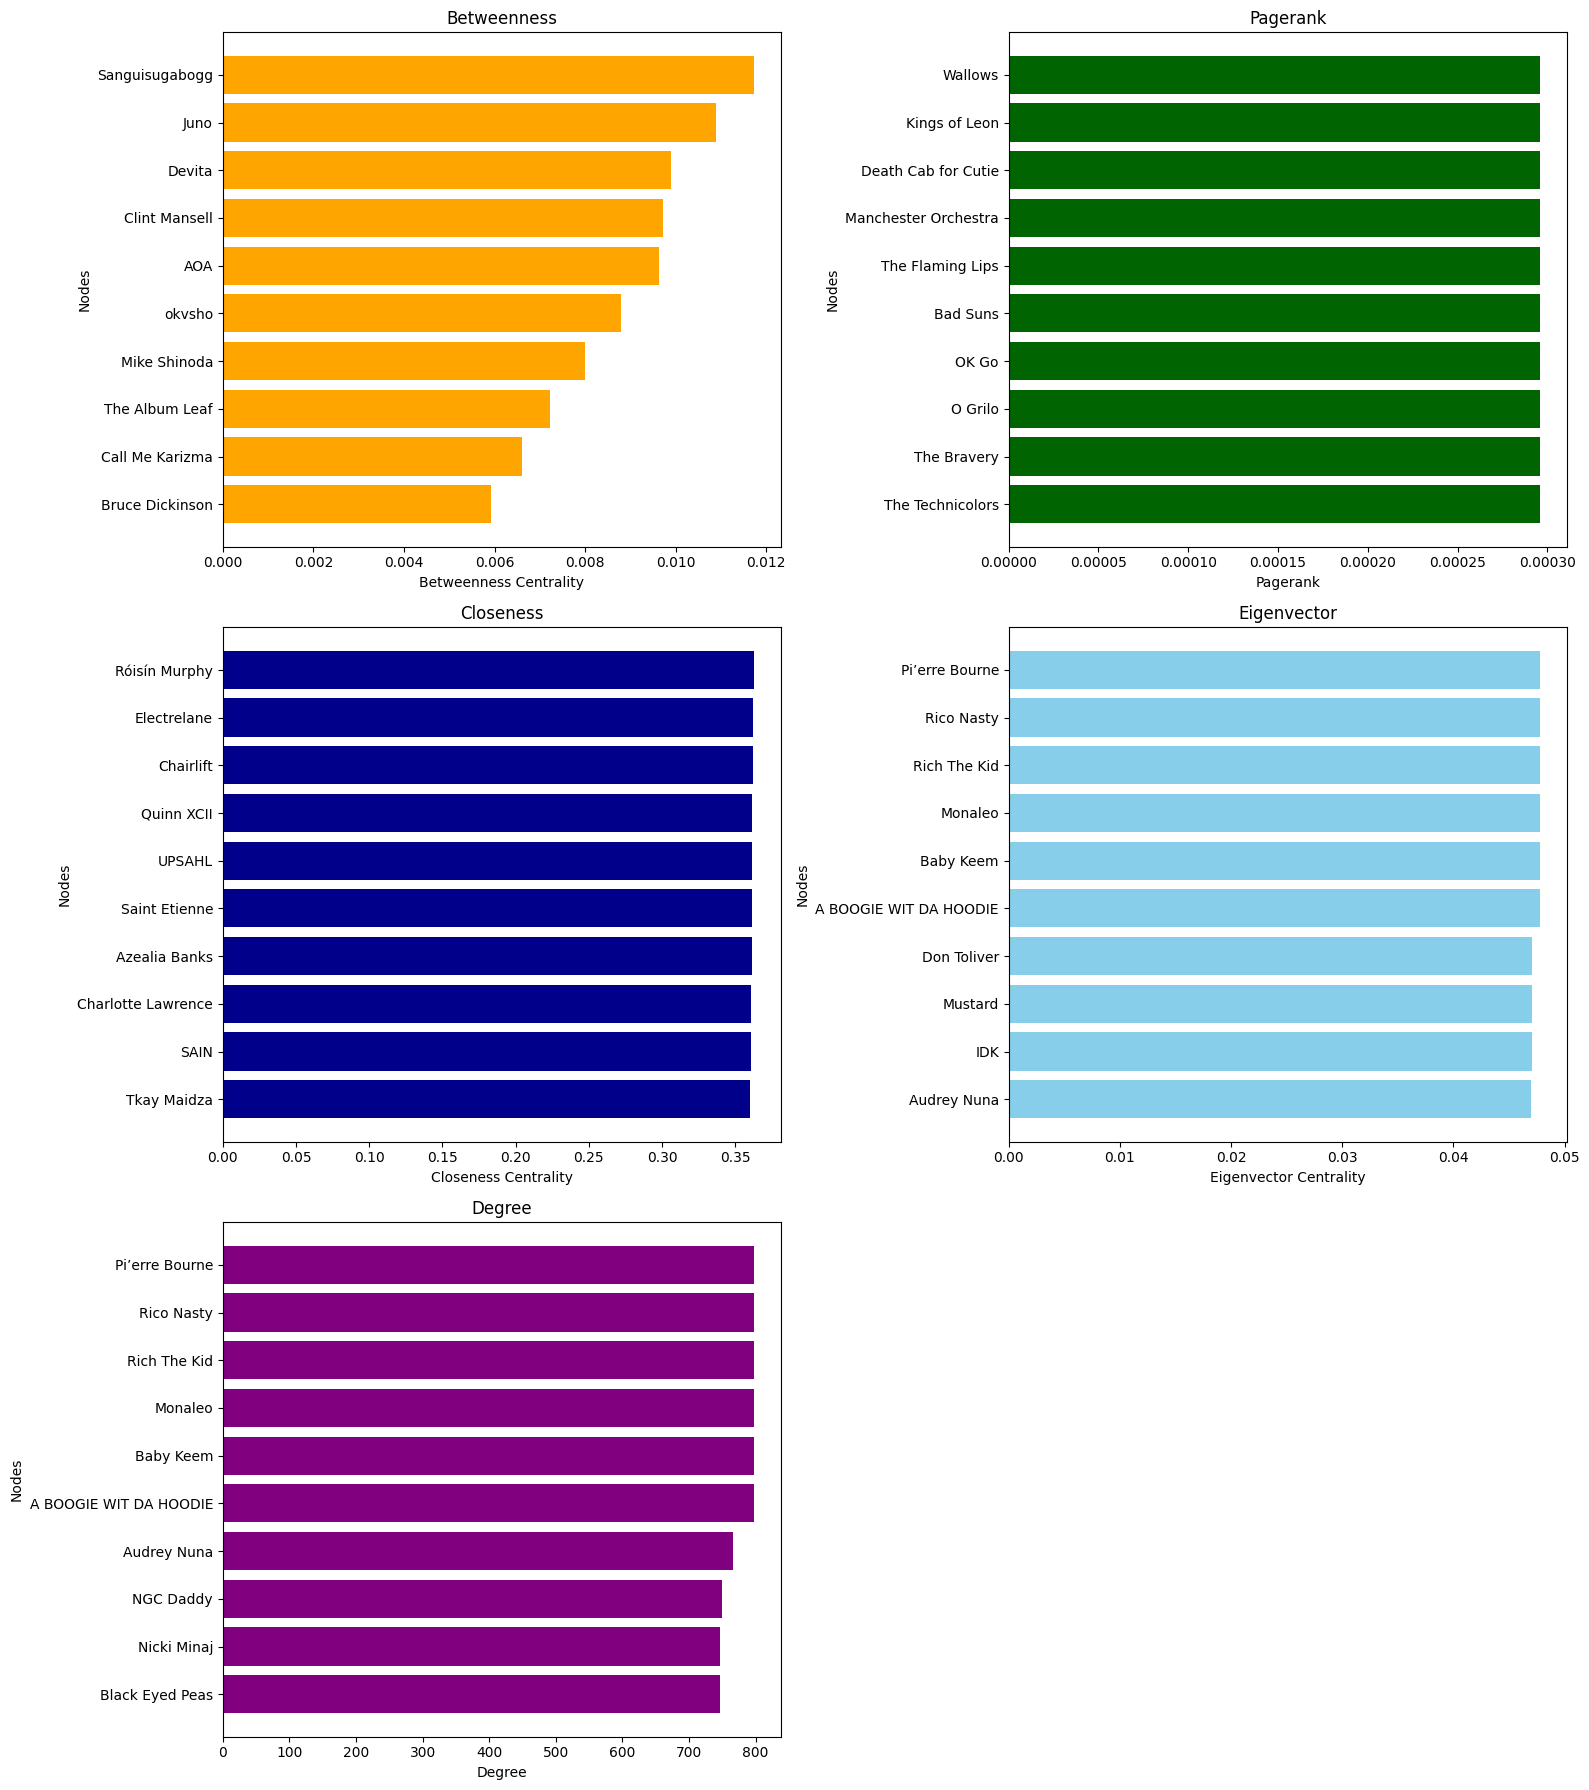

In [27]:
top_betweenness_nodes = [node for node, _ in branks[:10]]
top_betweenness_values = [betweenness for _, betweenness in branks[:10]]

top_pagerank_nodes = [node for node, _ in pranks[:10]]
top_pagerank_values = [pagerank for _, pagerank in pranks[:10]]

top_eigen_nodes = [node for node, _ in eranks[:10]]
top_eigen_values = [eigen for _, eigen in eranks[:10]]

top_closeness_nodes = [node for node, _ in clos_ranks[:10]]
top_closeness_values = [closeness for _, closeness in clos_ranks[:10]]

top_degree_nodes = [node for node, _ in degree_ranks[:10]]
top_degree_values = [degree for _, degree in degree_ranks[:10]]

# Creazione della figura e dei sotto-grafici
# Creazione della figura e dei sotto-grafici
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

# Grafico per betweenness centrality
axs[0, 0].barh(top_betweenness_nodes, top_betweenness_values, color='orange')
axs[0, 0].set_xlabel('Betweenness Centrality')
axs[0, 0].set_ylabel('Nodes')
axs[0, 0].set_title('Betweenness')
axs[0, 0].invert_yaxis()

# Grafico per pagerank
axs[0, 1].barh(top_pagerank_nodes, top_pagerank_values, color='darkgreen')
axs[0, 1].set_xlabel('Pagerank')
axs[0, 1].set_ylabel('Nodes')
axs[0, 1].set_title('Pagerank')
axs[0, 1].invert_yaxis()

# Grafico per closeness centrality
axs[1, 0].barh(top_closeness_nodes, top_closeness_values, color='darkblue')
axs[1, 0].set_xlabel('Closeness Centrality')
axs[1, 0].set_ylabel('Nodes')
axs[1, 0].set_title('Closeness')
axs[1, 0].invert_yaxis()

# Grafico per eigenvector centrality
axs[1, 1].barh(top_eigen_nodes, top_eigen_values, color='skyblue')
axs[1, 1].set_xlabel('Eigenvector Centrality')
axs[1, 1].set_ylabel('Nodes')
axs[1, 1].set_title('Eigenvector')
axs[1, 1].invert_yaxis()

# Grafico per grado
axs[2, 0].barh(top_degree_nodes, top_degree_values, color='purple')
axs[2, 0].set_xlabel('Degree')
axs[2, 0].set_ylabel('Nodes')
axs[2, 0].set_title('Degree')
axs[2, 0].invert_yaxis()

# Nascondi il sesto subplot vuoto
axs[2, 1].axis('off')
# Aumenta lo spazio tra i grafici
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# ASSORTATIVITY
nx.degree_assortativity_coefficient(g)

0.6856991132567136

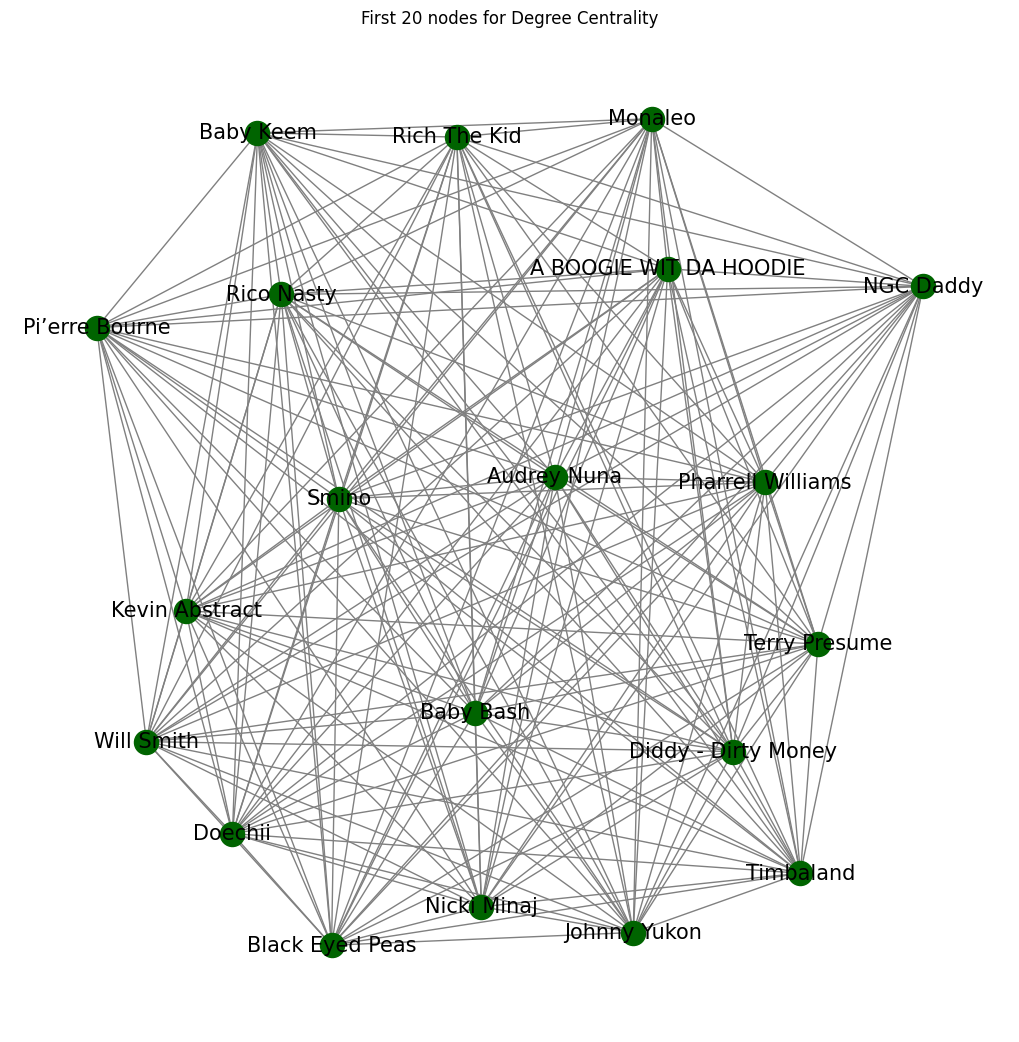

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Supponendo che 'g' sia il grafo esistente

# Calcolare il grado di ogni nodo
degree_centrality = nx.degree_centrality(g)

# Ordinare i nodi in base al grado
sorted_nodes = sorted(degree_centrality.items(), key=lambda item: -item[1])

# Selezionare i primi 30 nodi
top_30_nodes = [node for node, centrality in sorted_nodes[:20]]

# Creare un sottografo contenente solo questi nodi
subgraph = g.subgraph(top_30_nodes)

# Visualizzare il sottografo
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color="darkgreen", font_size=15, font_color="black", edge_color="gray")
plt.title('First 20 nodes for Degree Centrality')
plt.show()

Ego network and clustering coefficients of the nodes with the highest degree

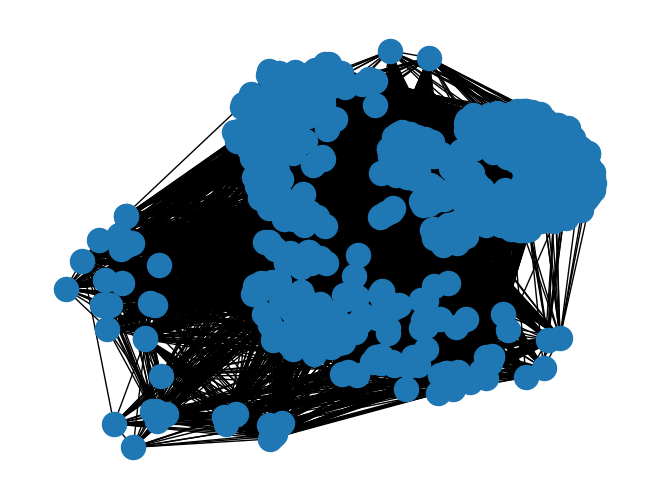

In [ ]:
ego = nx.ego_graph(g, 'Pi’erre Bourne') # ego network of the node Pi’erre Bourne
nx.draw(ego, with_labels=False)

In [ ]:
degrees = dict(g.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10]

[('Pi’erre Bourne', 798),
 ('Rico Nasty', 798),
 ('Rich The Kid', 798),
 ('Monaleo', 798),
 ('Baby Keem', 797),
 ('A BOOGIE WIT DA HOODIE', 797),
 ('Audrey Nuna', 766),
 ('NGC Daddy', 749),
 ('Nicki Minaj', 747),
 ('Black Eyed Peas', 747)]

In [ ]:
for i in range(10):
    node = ranks[i][0]
    print(node, "has a clustering coefficient of", nx.clustering(g,node))

Pi’erre Bourne has a clustering coefficient of 0.5082908022880287
Rico Nasty has a clustering coefficient of 0.5082908022880287
Rich The Kid has a clustering coefficient of 0.5082908022880287
Monaleo has a clustering coefficient of 0.5082908022880287
Baby Keem has a clustering coefficient of 0.509069815829461
A BOOGIE WIT DA HOODIE has a clustering coefficient of 0.5090477481510438
Audrey Nuna has a clustering coefficient of 0.529852045256745
NGC Daddy has a clustering coefficient of 0.5486281173471937
Nicki Minaj has a clustering coefficient of 0.5158578909023045
Black Eyed Peas has a clustering coefficient of 0.5158578909023045


In [ ]:
# per vedere i generi
df = pd.read_csv("artisti_df.csv")
dftop10 = df.loc[df['name'].isin(["Pi’erre Bourne","Rico Nasty","Rich The Kid","Monaleo","Baby Keem","A BOOGIE WIT DA HOODIE","Audrey Nuna"
                        ,"NGC Daddy","Nicki Minaj","Black Eyed Peas"])]
dftop10

0          1          2          3          4  \
2057  Hip-Hop        rap        rnb        pop    hip hop   
2084      rap    Hip-Hop       trap  seen live    hip hop   
2125  Hip-Hop        pop        rnb        rap    hip hop   
2288      rap    Hip-Hop    hip hop       trap  seen live   
2605     trap  seen live    Hip-Hop    hip hop        rap   
2898     trap        rap    Hip-Hop    hip hop  seen live   
3359  Hip-Hop        rap       trap    hip hop  seen live   
5351      rap    Hip-Hop  seen live    hip hop       trap   
5771  Hip-Hop        rap       trap    hip hop        pop   
8191     trap        rap    Hip-Hop    hip hop  brazilian   

                        name  
2057             Nicki Minaj  
2084               Baby Keem  
2125         Black Eyed Peas  
2288  A BOOGIE WIT DA HOODIE  
2605          Pi’erre Bourne  
2898              Rico Nasty  
3359            Rich The Kid  
5351                 Monaleo  
5771             Audrey Nuna  
8191               NGC Daddy

# BA

In [13]:
m = 7
ba = nx.barabasi_albert_graph(10000, m)

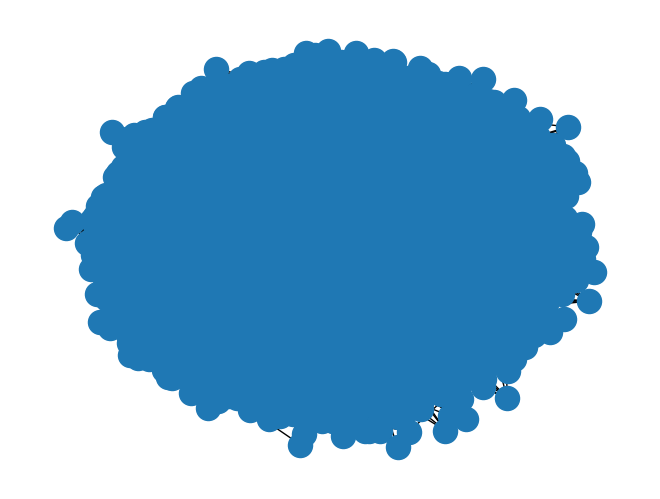

In [ ]:
m = 7  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(10000, m)
nx.draw(ba)

##### BA CHARACTERIZATION

In [ ]:
ba.number_of_edges()

69951

In [ ]:
sum(dict(ba.degree()).values())/float(len(ba))

13.9902

In [ ]:
nx.number_connected_components(ba)

1

In [ ]:
nx.diameter(ba)

5

In [14]:
average_shortest_path_length = nx.average_shortest_path_length(ba)

print(average_shortest_path_length)

3.3612763476347634


In [ ]:
plot_dist(ba)

Calculating best minimal value for power law fit


In [ ]:
nx.density(ba)

0.001399159915991599

In [ ]:
nx.average_clustering(ba)

0.009030422947544393

##### BA CENTRALITY

In [ ]:
# DEGREE CENTRALITY
degrees = dict(ba.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10]

[(0, 489),
 (8, 455),
 (10, 403),
 (14, 340),
 (11, 332),
 (9, 296),
 (3, 294),
 (39, 266),
 (50, 252),
 (18, 251)]

In [ ]:
# CLOSENESS CENTRALITY
closeness = nx.closeness_centrality(ba)
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:10]

[(0, 0.4505271695052717),
 (8, 0.44744260974627464),
 (10, 0.4375738479716424),
 (11, 0.43190358947777635),
 (9, 0.428957528957529),
 (14, 0.42431572246976446),
 (3, 0.41915740934814505),
 (13, 0.40672795314025384),
 (12, 0.4055895834178396),
 (18, 0.40434307897610094)]

In [ ]:
# BETWENNESS CENTRALITY
betweenness = nx.betweenness_centrality(ba)
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:10]

[(0, 0.06491290049476757),
 (8, 0.06013507791447949),
 (10, 0.04857448748282946),
 (11, 0.03705843602223457),
 (14, 0.036770869945657106),
 (9, 0.03224349070657315),
 (3, 0.029872774974526794),
 (39, 0.02263052448471113),
 (18, 0.022350900667402498),
 (13, 0.021702177728858733)]

In [ ]:
# PAGE RANK
pagerank = nx.pagerank(ba)
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:10]

[(0, 0.002978227621031263),
 (8, 0.002768607372527785),
 (10, 0.0024593279205608522),
 (14, 0.002080191912545864),
 (11, 0.002017398674302349),
 (3, 0.0018055783296272135),
 (9, 0.0017997024016814817),
 (39, 0.0016318918836882106),
 (50, 0.001571311240911366),
 (18, 0.001538336699417224)]

In [ ]:
# EIGENVECTOR CENTRALITY
eigen = nx.eigenvector_centrality(ba)
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:10]

[(0, 0.24966072719224247),
 (8, 0.23214083299052224),
 (10, 0.19545997248727623),
 (11, 0.17644563733063479),
 (9, 0.163343752662347),
 (14, 0.15786416287277039),
 (3, 0.14185210868506887),
 (13, 0.11424688935267943),
 (12, 0.11142715517093986),
 (18, 0.10335058637572707)]

In [ ]:
# ASSORTATIVITY
nx.degree_assortativity_coefficient(ba)

-0.023604231909387766

# ER

##### ER SUBCRITICAL  p < pc=1/N

In [15]:
p = 1/len(list(g.nodes()))
p

9.958175662218681e-05

In [16]:
erSub = nx.erdos_renyi_graph(10000, p - 0.00001)
# nx.draw(erSub)

In [ ]:
erSub.number_of_edges()

4390

In [ ]:
sum(dict(erSub.degree()).values())/float(len(erSub))

0.878

In [ ]:
nx.number_connected_components(erSub)

5610

In [17]:
componenti = list(nx.connected_components(erSub))

# Find the largest connected component
largest_component = max(componenti, key=len)

# Create a subgraph from the largest connected component
largest_subgraph = erSub.subgraph(largest_component).copy()

In [ ]:
len(list(largest_subgraph.nodes()))

92

In [ ]:
nx.diameter(largest_subgraph)

23

In [18]:
average_shortest_path_length = nx.average_shortest_path_length(largest_subgraph)

print(average_shortest_path_length)

9.779476724430852


In [ ]:
plot_dist(erSub)

Calculating best minimal value for power law fit


In [ ]:
nx.density(erSub)

8.780878087808782e-05

In [ ]:
nx.average_clustering(erSub)

0.0

In [ ]:
# DEGREE CENTRALITY
degrees = dict(erSub.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10]

[(2642, 8),
 (882, 6),
 (989, 6),
 (4326, 6),
 (7381, 6),
 (1415, 5),
 (2017, 5),
 (2025, 5),
 (2738, 5),
 (3179, 5)]

In [ ]:
nx.degree_assortativity_coefficient(erSub)

0.007343113236973922

##### ER CRITICAL  p = pc=1/N

In [19]:
erCrit = nx.erdos_renyi_graph(10000, p)
# nx.draw(erCrit)

In [ ]:
erCrit.number_of_edges()

5038

In [ ]:
sum(dict(erCrit.degree()).values())/float(len(erCrit))

1.0076

In [ ]:
nx.number_connected_components(erCrit)

4964

In [20]:
componenti = list(nx.connected_components(erCrit))

# Find the largest connected component
largest_component = max(componenti, key=len)

# Create a subgraph from the largest connected component
largest_subgraph = erCrit.subgraph(largest_component).copy()

In [ ]:
len(list(largest_subgraph.nodes()))

168

In [ ]:
nx.diameter(largest_subgraph)

35

In [21]:
average_shortest_path_length = nx.average_shortest_path_length(largest_subgraph)

print(average_shortest_path_length)

24.129524772497472


In [ ]:
plot_dist(erCrit)

Calculating best minimal value for power law fit


In [ ]:
nx.density(erCrit)

0.00010077007700770077

In [ ]:
nx.average_clustering(erCrit)

0.00015

In [ ]:
# DEGREE CENTRALITY
degrees = dict(erCrit.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10]

[(495, 7),
 (1346, 6),
 (2465, 6),
 (3510, 6),
 (6505, 6),
 (9873, 6),
 (117, 5),
 (553, 5),
 (572, 5),
 (1199, 5)]

In [ ]:
nx.degree_assortativity_coefficient(erCrit)

-0.011005954845520752

##### ER SUPERCRITICAL  p > pc=1/N

In [22]:
p + 0.0001 < np.log(10000)/10000 # check to verify if it's not connected

True

In [23]:
erSuper = nx.erdos_renyi_graph(10000, p + 0.0001)
# nx.draw(erCrit)

In [ ]:
erSuper.number_of_edges()

9801

In [ ]:
sum(dict(erSuper.degree()).values())/float(len(erSuper))

1.9602

In [ ]:
nx.number_connected_components(erSuper)

1739

In [24]:
componenti = list(nx.connected_components(erSuper))

# Find the largest connected component
largest_component = max(componenti, key=len)

# Create a subgraph from the largest connected component
largest_subgraph = erSuper.subgraph(largest_component).copy()

In [ ]:
len(list(largest_subgraph.nodes()))

7819

In [ ]:
nx.diameter(largest_subgraph)

30

In [25]:
average_shortest_path_length = nx.average_shortest_path_length(largest_subgraph)

print(average_shortest_path_length)

12.186959657501076


Calculating best minimal value for power law fit


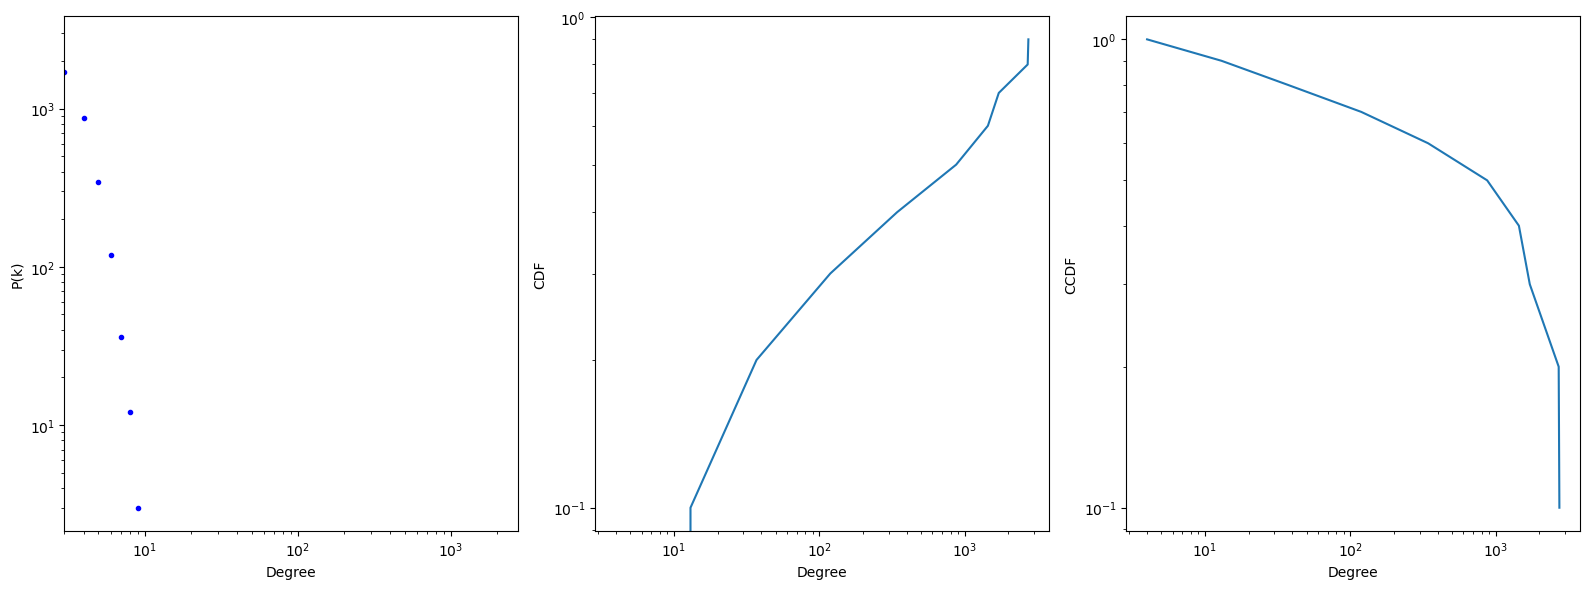

In [ ]:
plot_dist(erSuper)

In [ ]:
nx.density(erSuper)

0.00019603960396039603

In [ ]:
nx.average_clustering(erSuper)

0.00018333333333333334

In [ ]:
# DEGREE CENTRALITY
degrees = dict(erSuper.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10]

[(592, 9),
 (5678, 9),
 (9509, 9),
 (4134, 8),
 (5022, 8),
 (5816, 8),
 (6162, 8),
 (6399, 8),
 (6601, 8),
 (7012, 8)]

In [ ]:
nx.degree_assortativity_coefficient(erSuper)

0.0020589471292216488

##### ER CONNECTED  p > (ln N)/N)


In [26]:
p = np.log(10000)/10000
p

0.0009210340371976184

In [27]:
erConn = nx.erdos_renyi_graph(10000, p + 0.0001)
# nx.draw(erConn)

In [ ]:
erConn.number_of_edges()

51032

In [ ]:
sum(dict(erConn.degree()).values())/float(len(erConn))

10.2064

In [ ]:
nx.number_connected_components(erConn)

1

In [ ]:
nx.diameter(erConn)

7

In [28]:
average_shortest_path_length = nx.average_shortest_path_length(erConn)

print(average_shortest_path_length)

4.2324310831083105


Calculating best minimal value for power law fit


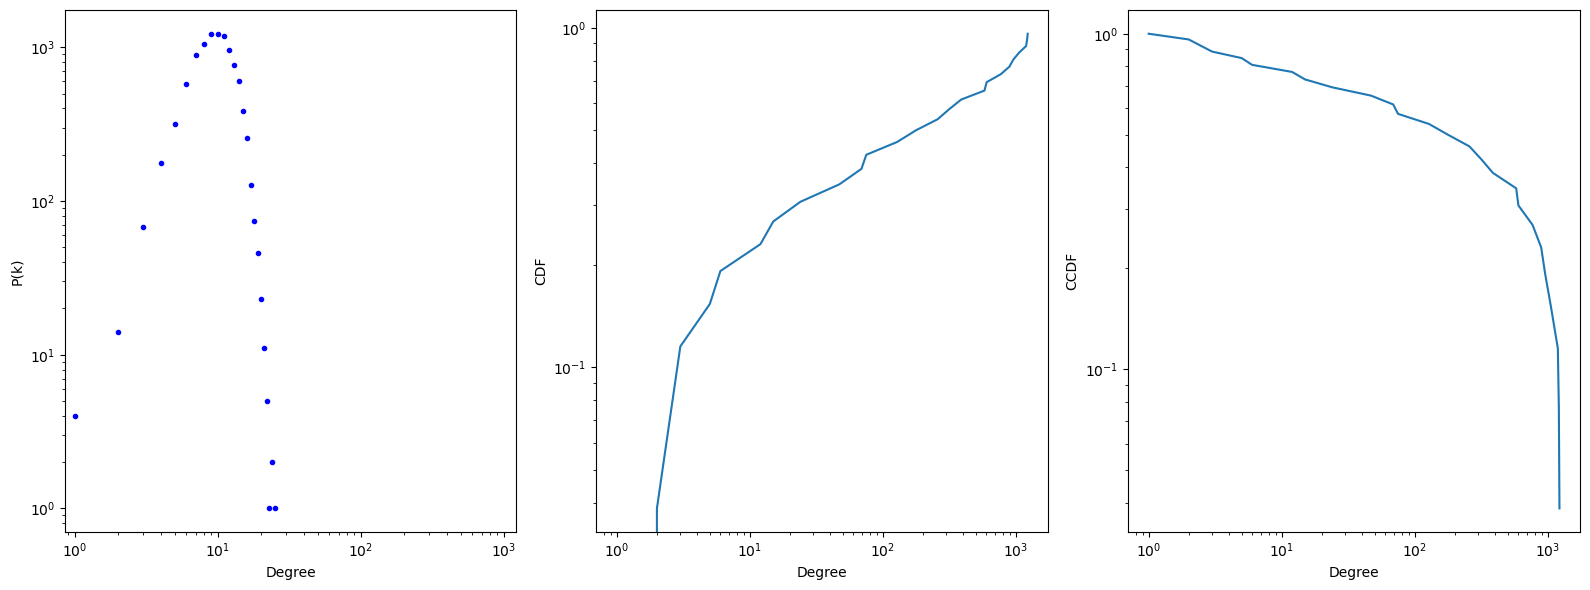

In [ ]:
plot_dist(erConn)

In [ ]:
nx.density(erConn)

0.0010207420742074206

In [ ]:
nx.average_clustering(erConn)

0.0010546496139328305

In [ ]:
# DEGREE CENTRALITY
degrees = dict(erConn.degree())
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10]

[(4727, 25),
 (2600, 24),
 (6980, 24),
 (4494, 23),
 (759, 22),
 (1145, 22),
 (4629, 22),
 (4851, 22),
 (7477, 22),
 (2605, 21)]

In [ ]:
nx.degree_assortativity_coefficient(erConn)

-0.001176057703312312